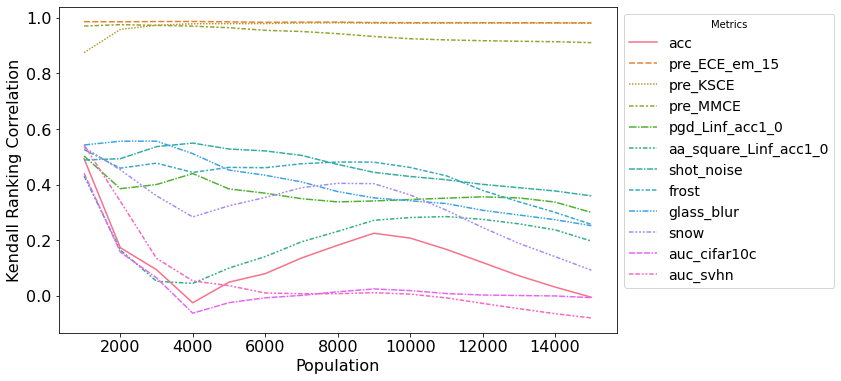

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cifar10_tss = pd.read_csv("../cifar10_tss.csv")
cifar10_tss = cifar10_tss.sort_values('acc')

columns_to_consider = ['acc', 'pre_ECE_em_15','pre_KSCE', 'pre_MMCE', 'pgd_Linf_acc1_0', "aa_square_Linf_acc1_0", 'shot_noise', 'frost', 'glass_blur', 'snow', 'auc_cifar10c', 'auc_svhn']

# Calculate Kendall rankings for different top accuracy points
top_accuracies = np.arange(1000, 15626, 1000)
kendall_rankings = []

for top_acc in top_accuracies:
    df = cifar10_tss.head(top_acc)
    selected_df = df[['pre_ECE_15'] + columns_to_consider]
    kendall_matrix = selected_df.corr(method='kendall')

    kendall_rankings.append(kendall_matrix.loc['pre_ECE_15', columns_to_consider].values)

kendall_rankings_df_ece = pd.DataFrame(kendall_rankings, columns=columns_to_consider, index=top_accuracies)
fontsize = 16
# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=kendall_rankings_df_ece)
plt.xlabel("Population", fontsize=fontsize)
plt.ylabel("Kendall Ranking Correlation", fontsize=fontsize)
plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)
# plt.title("Kendall Ranking vs. Top Accuracy Points")
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1), fontsize=14)

# plt.savefig("cifar10_ece_lineplot.pdf", dpi=1000, format='pdf', bbox_inches='tight')
plt.show()